In [ ]:
# Biblioteca
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import tifffile as tif

In [ ]:
# Lendo arquivo
img = tif.imread('L71221071_07120010720_DN.tif')

In [ ]:
# Calculando estatísticas para banda 6 com uma janela de 17x17
var  = ndimage.generic_filter(img[:,:,5], np.var, size=17)
std = ndimage.generic_filter(img[:,:,5], np.std, size=17)
min = ndimage.generic_filter(img[:,:,5], np.min, size=17)
max = ndimage.generic_filter(img[:,:,5], np.max, size=17)
mean = ndimage.generic_filter(img[:,:,5], np.mean, size=17)
median = ndimage.generic_filter(img[:,:,5], np.median, size=17)

In [ ]:
# Empilhando resultado
stack = np.dstack([var,std,min,max,mean,median])

In [ ]:
# Função de expansão
def expansao(img, percent_ini=2, percent_fim=98):
    s = np.zeros_like(img)
    x,y = 0,255  
    w = np.percentile(img, percent_ini)
    z = np.percentile(img, percent_fim)        
    p = x + (img - w) * (y - x) / (z - w)    
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

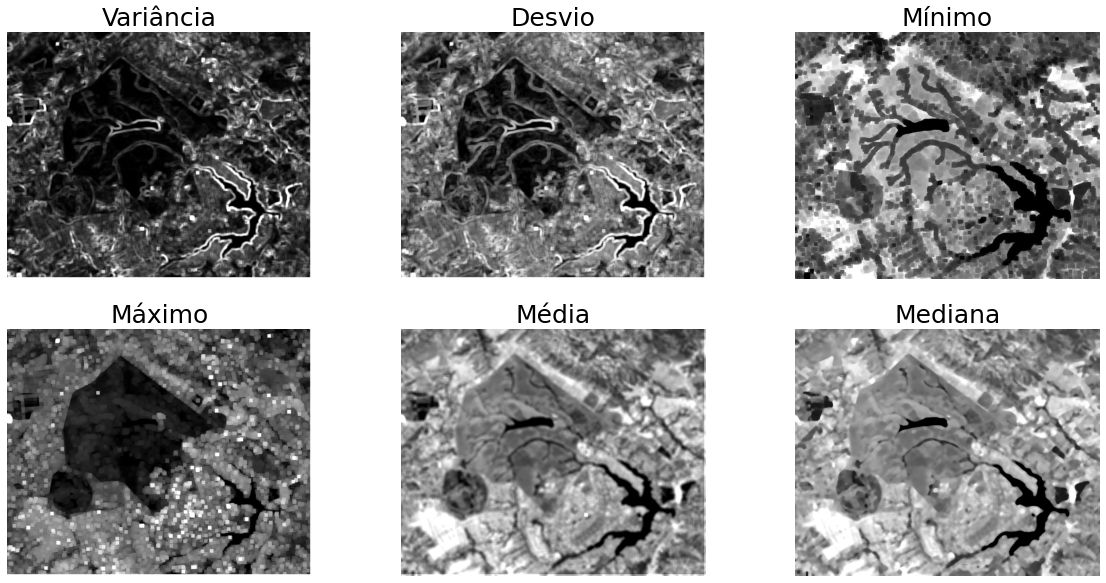

In [ ]:
# Visualizando resultado
nomes = ['Variância', 'Desvio', 'Mínimo', 'Máximo', 'Média', 'Mediana']

fig,axes = plt.subplots(2,3,figsize=(20,10),sharex='all', sharey='all') 

axes = axes.ravel() 
for i in range(stack.shape[2]): 
  axes[i].imshow(expansao(stack[:,:,i]),cmap='gray') 
  axes[i].set_title(nomes[i],fontsize=25) 
  axes[i].axis('off')